[View in Colaboratory](https://colab.research.google.com/github/cpoptic/workshops/blob/master/1_mnist_with_keras.ipynb)

# MNIST with tf.keras

Welcome! In this lab, you'll learn how to train an image classifier train on the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) - the "hello world" of computer vision. You'll go through all the steps, including loading the data, building and training a model, calculating the accuracy, and making predictions. Our focus here is on the code. For more on any of the concepts below, see [https://ai.google/education](https://ai.google/education).

In [2]:
!pip install -q -U tensorflow==1.8.0
import tensorflow as tf

import numpy as np

### Step 1: Download the dataset

The MNIST dataset contains thousands of grayscale images of handwritten digits.

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

### Step 2) Visualize the data
Let's see how the images look. This function shows a random example along with it's corresponding label.

Label: 4


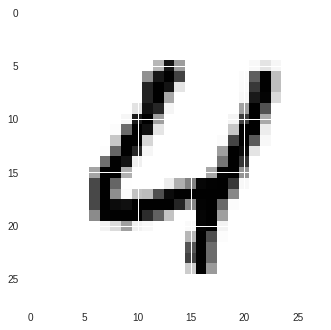

In [4]:
import random
import matplotlib.pyplot as plt

i = random.randint(0, 100)

print("Label: %s" % train_labels[i])
plt.imshow(train_images[i])

### Step 3) Understand the data format

We are given the images as a 3-D array of integer values that is of shape (*N*, 28, 28), where *N* is the number of images in the training or test set. The labels are 1-D array of the integer values of each image.

In [5]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


### Step 4) Reformat the images
Here, we'll flatten (or unstack) the images. There are deep learning techniques that work with 2d images directly (rather than their flattened representation), but we'll start with this format. Instead of working with a 28 by 28 *image*, we'll unstack it into a 28 \* 28 = 784 length *array*.

* We want to convert the 3-D array of shape (*N*, 28, 28) to a 2-D array of shape (*N*, 784) where the second dimension is just an array of all the pixels in an image. This is called flattening, or unstacking, the images. 
* We also want to convert the pixel values from a number between 0 and 255 to a number between 0 and 1.

In [6]:
TRAINING_SIZE = len(train_images)
TEST_SIZE = len(test_images)

In [7]:
TEST_SIZE

10000

In [8]:

# Reshape from (N, 28, 28) to (N, 784)
train_images = np.reshape(train_images, (TRAINING_SIZE, 784))
test_images = np.reshape(test_images, (TEST_SIZE, 784))

# Convert the array to float32 as opposed to uint8
train_images = train_images.astype(np.float32)
test_images = test_images.astype(np.float32)

# Convert the pixel values from integers between 0 and 255 to floats between 0 and 1
train_images /= 255
test_images /=  255

In [9]:
test_images.shape

(10000, 784)

([array([10000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([10000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([10000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([10000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([10000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([10000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([10000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([10000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([10000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([10000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),


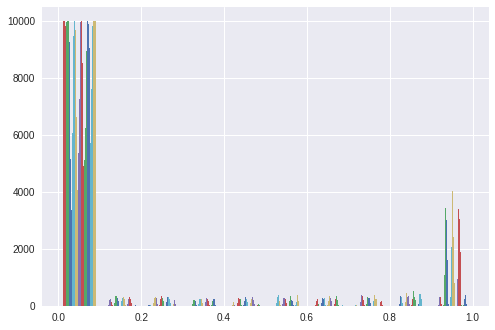

In [10]:
x = np.arange(0,255)
plt.hist(test_images)

In [11]:
test_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
test_images[0].shape

(784,)

(array([672.,   5.,   2.,   5.,   1.,   9.,   6.,   3.,   3.,   0.,   1.,
          5.,   2.,   3.,   1.,   2.,   2.,   1.,   2.,   9.,   3.,   5.,
          4.,   5.,  33.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ]),
 <a list of 25 Patch objects>)

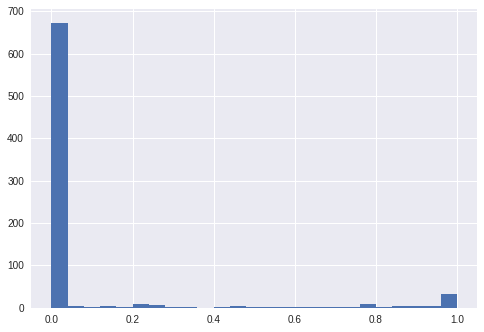

In [13]:
# plot a histogram of pixel values between 0 & 1.  Turns out most values are 0
plt.hist(test_images[0], bins = 25)

In [14]:
len(test_images[0]==0)

784

In [16]:



TRAINING_SIZE = len(train_images)
TEST_SIZE = len(test_images)

train_images = np.reshape(train_images, (TRAINING_SIZE, 784))
tetst_images = np.reshape(test_images, (TEST_SIZE, 784))

# convert array to float 32
train_iamges = train_images.astype(np.float32)
test_images = test_images.astype(np.float32)

train_images = train_images/255

### Step 5) Reformat the labels

Next, we want to convert the labels from an integer format (e.g., "2"), to a [one hot encoding](https://en.wikipedia.org/wiki/One-hot) (e.g., "0, 0, 1, 0, 0, 0, 0, 0, 0, 0"). To do so, we'll use the `tf.keras.utils.to_categorical` [function](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) function.

In [17]:
NUM_DIGITS = 10

print("Before", train_labels[0]) # The format of the labels before conversion

train_labels  = tf.keras.utils.to_categorical(train_labels, NUM_DIGITS)


('Before', 5)
('After', array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]))


In [18]:

print("After", train_labels[0]) # The format of the labels after conversion

test_labels = tf.keras.utils.to_categorical(test_labels, NUM_DIGITS)

('After', array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]))


### Step 6) Build the model

Now, we'll create our neural network using the [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential). 
* Architecture wise, we'll single layer network. 
* The hidden layer will have 512 units using the [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu) activation function. 
* The output layer will have 10 units and use [softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) function. 
* Notice, we specify the input shape on the first layer. If you add subsequent layers, this is not necessary. 
* We will use the [categorical crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/categorical_crossentropy) loss function, and the [RMSProp](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/RMSprop) optimizer.

In [19]:
rms_model = tf.keras.Sequential()
rms_model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(784,)))
rms_model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# We will now compile and print out a summary of our model
rms_model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

rms_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [23]:
# build a 2nd model but this time use the Adam optimizer


adam_model = tf.keras.Sequential()
adam_model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(784,)))
adam_model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

adam_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
                                                         
adam_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### Step 7) Training

Next, we will train the model by using the [fit method](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#fit) for 5 [epochs](https://www.quora.com/What-is-epochs-in-machine-learning). We will keep track of the training loss and accuracy as we go. Please be patient as this step may take a while depending on your hardware.

In [24]:
rms_model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 9s 158us/step - loss: 0.9148 - acc: 0.7681
Epoch 2/5
60000/60000 [==============================] - 10s 167us/step - loss: 0.3717 - acc: 0.8962
Epoch 3/5
48352/60000 [=======================>......] - ETA: 1s - loss: 0.3176 - acc: 0.9087

60000/60000 [==============================] - 10s 166us/step - loss: 0.3162 - acc: 0.9090
Epoch 4/5
60000/60000 [==============================] - 10s 165us/step - loss: 0.2904 - acc: 0.9159
Epoch 5/5
60000/60000 [==============================] - 10s 168us/step - loss: 0.2708 - acc: 0.9224


In [25]:
adam_model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 9s 156us/step - loss: 0.9122 - acc: 0.7768
Epoch 2/5
60000/60000 [==============================] - 10s 166us/step - loss: 0.3735 - acc: 0.8953
Epoch 3/5
48224/60000 [=======================>......] - ETA: 1s - loss: 0.3200 - acc: 0.9080

60000/60000 [==============================] - 10s 167us/step - loss: 0.3169 - acc: 0.9088
Epoch 4/5
60000/60000 [==============================] - 10s 166us/step - loss: 0.2896 - acc: 0.9149
Epoch 5/5
60000/60000 [==============================] - 10s 162us/step - loss: 0.2689 - acc: 0.9218


### Step 8) Testing
Now that we have trained our model, we want to evaluate it. Sure, our model is >97% accurate on the training set, but what about on data it hasn't seen before? The test accuracy is a good metric for that.

In [28]:
# get loss & accuracy for each model
rms_model_loss, rms_model_accuracy = rms_model.evaluate(test_images, test_labels)
print('Test accuracy: %.2f' % (rms_model_accuracy))

ValueError: ignored

In [27]:
adam_model_loss, adam_model_accuracy = adam_model.evaluate(test_images, test_labels)
print('Test accuracy for Adam model: %.2f' %(adam_model_accuracy))

ValueError: ignored

## Congratulations
You have successfully used TensorFlow Keras to train a model on the MNIST dataset.